<a href="https://colab.research.google.com/github/UPENDRAA09/Machine-Learning/blob/main/KNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# KNN Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
filename = '/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, names=names)
array1 = dataframe.values
X = array1[:, 0:8]
Y = array1[:, 8]

In [4]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [6]:
dataframe

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X,Y)

KNeighborsClassifier()

In [8]:
model.predict([[3,100,80,35,120,28.9,0.4,28],[4,50,67,22,400,15,0.2,50]])

array([0., 0.])

In [9]:
# Using k fold cross validation
kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=14)
results = cross_val_score(model, X, Y, cv=kfold)

In [10]:
results

array([0.71428571, 0.81818182, 0.68831169, 0.64935065, 0.77922078,
       0.76623377, 0.80519481, 0.85714286, 0.75      , 0.73684211])

In [11]:
 print(results.mean())

0.7564764183185235


Visualizing the CV results

In [12]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 50)
# empty list to store scores
k_scores = []

#we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


# k_scores=grid.best_score_
dframe = pd.DataFrame()
dframe["no_neighbours"]= range(1,50)
dframe["Accuracy"] = pd.DataFrame(k_scores)

In [13]:
dframe

,no_neighbours,Accuracy
0,1,0.679665
1,2,0.712235
2,3,0.703059
3,4,0.718712
4,5,0.721377
5,6,0.735714
6,7,0.739627
7,8,0.738312
8,9,0.738346
9,10,0.743472


In [14]:
dframe.sort_values(by = "Accuracy",ascending=False)

,no_neighbours,Accuracy
16,17,0.755297
17,18,0.755280
13,14,0.753913
15,16,0.752614
21,22,0.750120
20,21,0.750068
22,23,0.747522
18,19,0.747471
11,12,0.747368
24,25,0.746206


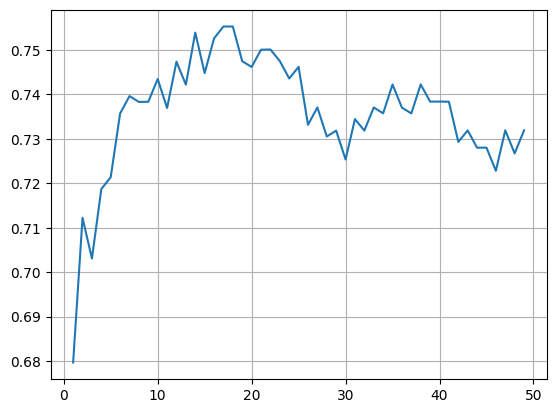

In [15]:
plt.grid()
plt.plot(dframe["no_neighbours"],dframe["Accuracy"])